In [235]:
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)

inputpath = r"D:\privat_neu\finanz\ausgaben\Exoprte\Toshl export Jan 1, 2020 - Dec 31, 2023.csv"

data = pd.read_csv(inputpath)
data.Date =pd.to_datetime(data.Date)
data = data.rename(columns={'Income amount':'Income', 'Expense amount':'Expense', 'In main currency':'In_main_currency'})
data.Income = pd.to_numeric(data.Income.str.replace(',',''))
data.Expense = pd.to_numeric(data.Expense.str.replace(',',''))
data.In_main_currency = pd.to_numeric(data.In_main_currency.str.replace(',',''))


#put all expences in main currency and negative
data['allExpencesInSEK'] = 0
data.loc[data.Expense > 0, 'allExpencesInSEK'] = data.In_main_currency
data['allExpencesInSEK'] = data['allExpencesInSEK'] *-1

data['Year_Month'] = data.Date.dt.to_period('M')
data['Year'] = data.Date.dt.to_period('Y')
data

,Date,Account,Category,Tags,Expense,Income,Currency,In_main_currency,Main currency,Description,allExpencesInSEK,Year_Month,Year
0,2020-01-01,Cash,Home & Utilities,mobile phone,50.00,0.00,SEK,50.00,SEK,NaN,-50.00,2020-01,2020
1,2020-01-02,Cash,Clothing & Footwear,clothes,125.00,0.00,SEK,125.00,SEK,NaN,-125.00,2020-01,2020
2,2020-01-02,Cash,Food & Drinks,groceries,53.00,0.00,SEK,53.00,SEK,NaN,-53.00,2020-01,2020
3,2020-01-02,Cash,Food & Drinks,groceries,809.00,0.00,SEK,809.00,SEK,NaN,-809.00,2020-01,2020
4,2020-01-02,Cash,Rechnungen,NaN,64.00,0.00,SEK,64.00,SEK,NaN,-64.00,2020-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2023-12-21,Cash,Grants,Elterngeld,0.00,1484.00,NOK,1453.70,SEK,NaN,-0.00,2023-12,2023
5050,2023-12-26,Cash,Salary,NaN,0.00,14063.00,NOK,13861.60,SEK,NaN,-0.00,2023-12,2023
5051,2023-12-26,Cash,Salary,NaN,0.00,42626.00,NOK,42015.55,SEK,NaN,-0.00,2023-12,2023
5052,2023-12-26,Cash,Salary,NaN,0.00,47001.00,NOK,46327.90,SEK,NaN,-0.00,2023-12,2023


In [236]:

data

,Date,Account,Category,Tags,Expense,Income,Currency,In_main_currency,Main currency,Description,allExpencesInSEK,Year_Month,Year
0,2020-01-01,Cash,Home & Utilities,mobile phone,50.00,0.00,SEK,50.00,SEK,NaN,-50.00,2020-01,2020
1,2020-01-02,Cash,Clothing & Footwear,clothes,125.00,0.00,SEK,125.00,SEK,NaN,-125.00,2020-01,2020
2,2020-01-02,Cash,Food & Drinks,groceries,53.00,0.00,SEK,53.00,SEK,NaN,-53.00,2020-01,2020
3,2020-01-02,Cash,Food & Drinks,groceries,809.00,0.00,SEK,809.00,SEK,NaN,-809.00,2020-01,2020
4,2020-01-02,Cash,Rechnungen,NaN,64.00,0.00,SEK,64.00,SEK,NaN,-64.00,2020-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2023-12-21,Cash,Grants,Elterngeld,0.00,1484.00,NOK,1453.70,SEK,NaN,-0.00,2023-12,2023
5050,2023-12-26,Cash,Salary,NaN,0.00,14063.00,NOK,13861.60,SEK,NaN,-0.00,2023-12,2023
5051,2023-12-26,Cash,Salary,NaN,0.00,42626.00,NOK,42015.55,SEK,NaN,-0.00,2023-12,2023
5052,2023-12-26,Cash,Salary,NaN,0.00,47001.00,NOK,46327.90,SEK,NaN,-0.00,2023-12,2023


In [237]:
def max_year_monthly(df:pd.DataFrame, value_column, name_value_column):
    year = max(df.Date.dt.year)

    title =f"{name_value_column} für {year} pro Monat"
    d = df[df.Date.dt.year== year].groupby(by=[df.Date.dt.to_period('M')], as_index=True)[value_column].sum()
    d.plot.bar(title=title)
    return pd.DataFrame(d).transpose()
    

In [238]:
def monthly_avg_per_year(df:pd.DataFrame, value_column, name_value_column):
    title = f"Monats{name_value_column.lower()} pro Jahr im Schnitt"
    d = df.groupby(by=[df.Date.dt.year,data.Date.dt.month ], as_index=True)[value_column].sum()

    d = d.groupby(by=[d.index.get_level_values(0)], as_index=True).mean()

    d.plot.bar(title=title)
    return pd.DataFrame(d).transpose()

## Einkommen


Date,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Income,94671.00,99264.00,96176.00,95166.00,117672.00,101289.00,99635.00,96231.00,96057.00,129230.00,98882.00,111784.00


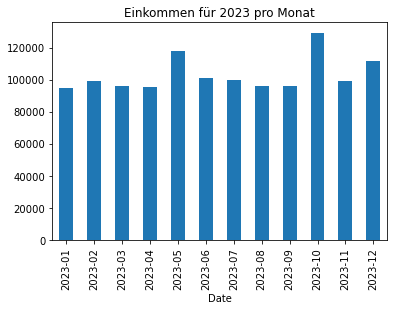

In [239]:
max_year_monthly(data, 'Income', 'Einkommen')

Date,2020,2021,2022,2023
Income,73713.75,90851.21,86975.25,103004.75


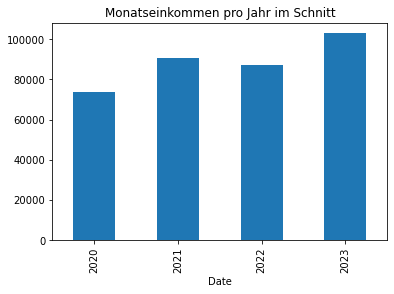

In [240]:
monthly_avg_per_year(data, 'Income', 'Einkommen')

## Ausgaben allgemein


Date,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
allExpencesInSEK,-70217.69,-81630.00,-78451.00,-106320.59,-101443.00,-86920.96,-101809.28,-83975.90,-127274.76,-93051.36,-103408.56,-79084.78


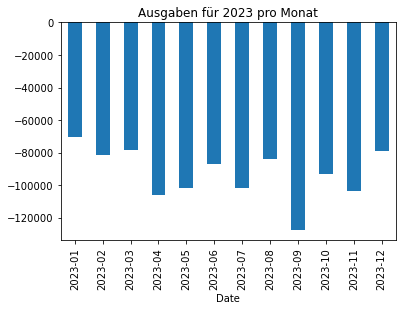

In [241]:
max_year_monthly(data, 'allExpencesInSEK', 'Ausgaben')

Date,2020,2021,2022,2023
allExpencesInSEK,-73689.55,-87129.02,-87273.47,-92798.99


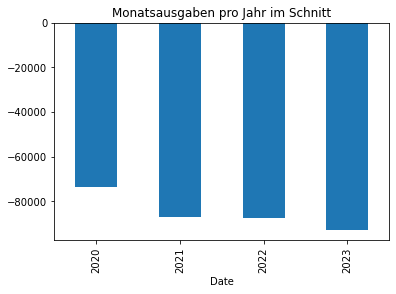

In [242]:
monthly_avg_per_year(data, 'allExpencesInSEK', 'Ausgaben')

## Ausgaben in Kategorien


In [289]:

#aggregate 
def generate_agg(df:pd.DataFrame, agg_columns, agg_func, allIncomes):
    pivotGeneral = pd.pivot_table(
    df,
    index=["Category"],
    values=["allExpencesInSEK"],
    aggfunc=agg_func,
    fill_value=0,
    columns=agg_columns,
    margins=True)


    pivotGeneral.columns = pivotGeneral.columns.get_level_values(1)
    
    
    allIncomes = allIncomes
    allIncomes.name = 'all incomes'
    allExpences = pivotGeneral.loc['All']
    over = allIncomes + allExpences #expenses are negative!
    over.name = 'left'

    sparquote = pivotGeneral.loc['Sparen'] / allIncomes
    sparquote.name = 'Sparquote'

    reineAusgaben = allExpences - pivotGeneral.loc['Sparen']

    reineAusgaben.name = 'reine Ausgaben'

    pivotGeneral= pivotGeneral.append(allIncomes, ignore_index =False, sort= False)
    pivotGeneral= pivotGeneral.append(over, ignore_index =False, sort= False)
    pivotGeneral= pivotGeneral.append(sparquote, ignore_index =False, sort= False)
    pivotGeneral= pivotGeneral.append(reineAusgaben, ignore_index =False, sort= False)

    return pivotGeneral


allIncomes = data[data.Category.isin(['Salary', 'Grants' , 'Reimbursements'])].groupby(by=['Year_Month', 'Year']).Income.sum()
   
      
pivotMonth = generate_agg(data, ['Year_Month'], 'sum', allIncomes)


allIncomes = allIncomes.groupby(by=['Year']).mean()


b = data.groupby(by=['Year_Month', 'Year', 'Category'], as_index=False).allExpencesInSEK.sum()
#b.groupby(by=[ 'Year', 'Category'], as_index=False).mean()
pivotYear = generate_agg(b, ['Year'], 'mean', allIncomes)

C:\Users\janin\AppData\Local\Temp\ipykernel_12380\622409101.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivotGeneral= pivotGeneral.append(allIncomes, ignore_index =False, sort= False)
C:\Users\janin\AppData\Local\Temp\ipykernel_12380\622409101.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivotGeneral= pivotGeneral.append(over, ignore_index =False, sort= False)
C:\Users\janin\AppData\Local\Temp\ipykernel_12380\622409101.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivotGeneral= pivotGeneral.append(sparquote, ignore_index =False, sort= False)
C:\Users\janin\AppData\Local\Temp\ipykernel_12380\622409101.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

In [290]:
pivotYear

Year,2020,2021,2022,2023,All
Category,,,,,
Charity,-31.72,0.00,0.00,0.00,-31.72
Clothing & Footwear,-745.81,-1022.64,-1445.10,-1112.52,-1098.83
Education,-184.00,-2486.62,-855.00,-3800.00,-1552.22
Food & Drinks,-6944.03,-6854.13,-7473.78,-7846.48,-7279.61
Gifts,-1433.56,-2201.84,-1245.16,-2097.28,-1742.33
Grants,0.00,0.00,0.00,0.00,0.00
Health & Personal Care,-903.57,-1145.10,-650.75,-553.90,-788.78
Home & Utilities,-6058.37,-7435.87,-8862.22,-7814.96,-7542.86
Kinder,-4293.00,-3572.00,-2093.00,-2358.31,-3132.35


In [245]:
pivotMonth

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,"(2023-03, 2023)","(2023-04, 2023)","(2023-05, 2023)","(2023-06, 2023)","(2023-07, 2023)","(2023-08, 2023)","(2023-09, 2023)","(2023-10, 2023)","(2023-11, 2023)","(2023-12, 2023)"
Category,,,,,,,,,,,,,,,,,,,,,
Charity,0.00,-31.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clothing & Footwear,-976.08,-158.82,0.00,0.00,-650.00,-1489.00,-3019.00,-315.00,-156.18,-416.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,0.00,0.00,0.00,0.00,0.00,-350.00,-18.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food & Drinks,-5511.45,-7575.94,-7082.00,-6819.00,-7559.00,-7061.80,-8601.00,-6387.06,-5695.09,-7222.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gifts,0.00,-304.25,0.00,0.00,0.00,-400.00,0.00,0.00,-564.10,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grants,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health & Personal Care,-326.00,0.00,-555.00,0.00,0.00,-1534.00,-385.00,-674.00,-13.10,-1902.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home & Utilities,-1189.00,-9828.00,-988.00,-6403.35,-9698.00,-1119.00,-4625.00,-9603.00,-1597.13,-2872.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kinder,-5735.00,-2464.00,-6184.00,0.00,-3009.00,-2464.00,-2464.00,-418.00,-2464.00,-5706.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
current_year = max(data.Date.dt.year)
columns_for_year = [x for x in data.Year_Month.unique() if x.year == current_year]
columns_for_year


[Period('2023-01', 'M'),
 Period('2023-02', 'M'),
 Period('2023-03', 'M'),
 Period('2023-04', 'M'),
 Period('2023-05', 'M'),
 Period('2023-06', 'M'),
 Period('2023-07', 'M'),
 Period('2023-08', 'M'),
 Period('2023-09', 'M'),
 Period('2023-10', 'M'),
 Period('2023-11', 'M'),
 Period('2023-12', 'M')]

### Verteilung über Kategorien

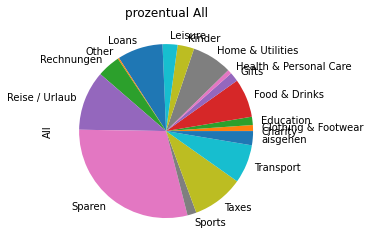

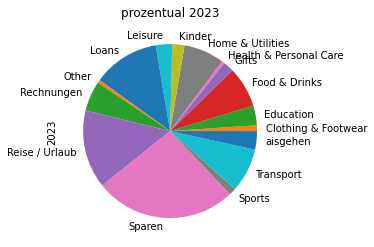

Category,Sparen,Reise / Urlaub,Taxes,Loans,Home & Utilities,Food & Drinks,Transport,Rechnungen,Kinder,Leisure,...,Gifts,Sports,Education,Clothing & Footwear,Health & Personal Care,Other,Charity,Reimbursements,Salary,Grants
2023,0.26,0.15,-0.00,0.12,0.08,0.08,0.08,0.06,0.02,0.03,...,0.02,0.01,0.04,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00
All,0.29,0.11,0.10,0.08,0.07,0.07,0.07,0.04,0.03,0.03,...,0.02,0.02,0.02,0.01,0.01,0.00,0.00,-0.00,-0.00,-0.00


In [280]:
#pivotYear[str(current_year)].plot.pie()
pivotYear.columns[-2]
piedata = pd.DataFrame(pivotYear[pivotYear.columns[-2]])
piedata['All'] = pivotYear[pivotYear.columns[-1]]
piedata = piedata.drop(labels=['All','all incomes','left','Sparquote','reine Ausgaben'])
piedata = piedata * (-1)

piedata = piedata / piedata.sum()
piedata.All.plot.pie(title = 'prozentual All')
plt.show()
piedata[piedata.columns[0]].plot.pie(title = 'prozentual 2023')
plt.show()
display(piedata.sort_values(by='All', ascending=False).transpose())

## Verteilung pro Kategorie

In [248]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
def max_year_monthly_cat(df:pd.DataFrame, cat, columns_for_year):

    a = df.loc[cat]
    a = a[a.index.isin(columns_for_year)]
    title =f"{cat} für {current_year} pro Monat"
    a.plot.bar(title=title)
    plt.show()
    display(pd.DataFrame(a).transpose())


In [286]:
#get important categories
top10 = list(piedata.sort_values(by='All', ascending=False).index[0:10])
top10.extend(['All','all incomes','left','Sparquote','reine Ausgaben'])
top10

['Sparen',
 'Reise / Urlaub',
 'Taxes',
 'Loans',
 'Home & Utilities',
 'Food & Drinks',
 'Transport',
 'Rechnungen',
 'Kinder',
 'Leisure',
 'All',
 'all incomes',
 'left',
 'Sparquote',
 'reine Ausgaben']

In [249]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
def avg_per_month_per_year_cat(df:pd.DataFrame, cat):
    title = f"Durchschnitt für {cat} pro Monat pro Jahr"
    
    a = df.loc[cat]
    a.plot.bar(title=title)
    plt.show()
    display(pd.DataFrame(a).transpose())


In [281]:
pivotYear

Year,2020,2021,2022,2023,All
Category,,,,,
Charity,-31.72,0.00,0.00,0.00,-31.72
Clothing & Footwear,-745.81,-1022.64,-1445.10,-1112.52,-1098.83
Education,-184.00,-2486.62,-855.00,-3800.00,-1552.22
Food & Drinks,-6944.03,-6854.13,-7473.78,-7846.48,-7279.61
Gifts,-1433.56,-2201.84,-1245.16,-2097.28,-1742.33
Grants,0.00,0.00,0.00,0.00,0.00
Health & Personal Care,-903.57,-1145.10,-650.75,-553.90,-788.78
Home & Utilities,-6058.37,-7435.87,-8862.22,-7814.96,-7542.86
Kinder,-4293.00,-3572.00,-2093.00,-2358.31,-3132.35


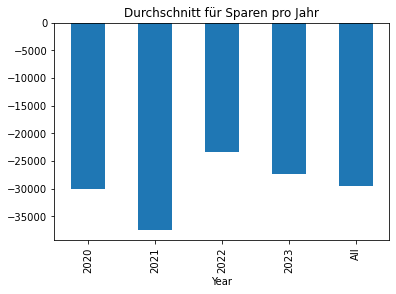

Year,2020,2021,2022,2023,All
Sparen,-30079.83,-37486.58,-23420.50,-27355.83,-29585.69


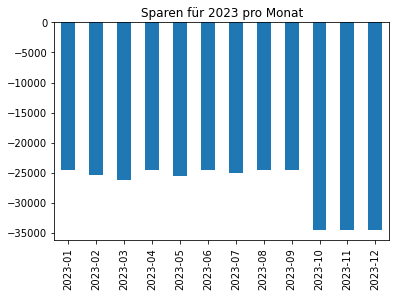

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Sparen,-24500.00,-25460.00,-26240.00,-24500.00,-25530.00,-24500.00,-25040.00,-24500.00,-24500.00,-34500.00,-34500.00,-34500.00


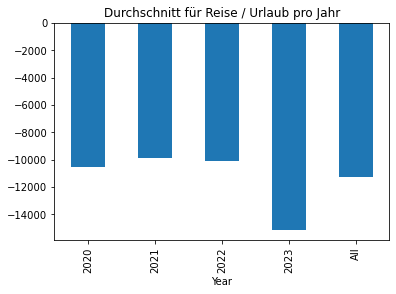

Year,2020,2021,2022,2023,All
Reise / Urlaub,-10572.31,-9858.09,-10092.24,-15142.16,-11249.55


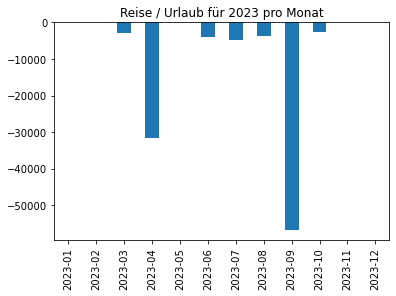

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Reise / Urlaub,0.00,0.00,-2835.00,-31611.00,0.00,-4028.50,-4730.00,-3578.00,-56715.48,-2497.12,0.00,0.00


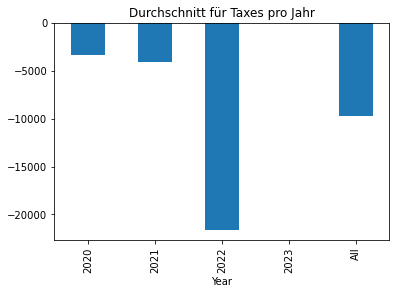

Year,2020,2021,2022,2023,All
Taxes,-3355.00,-4055.00,-21625.00,0.00,-9678.33


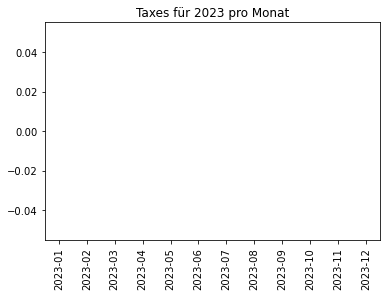

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Taxes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


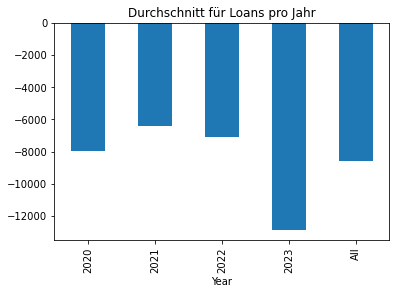

Year,2020,2021,2022,2023,All
Loans,-7959.75,-6374.25,-7067.58,-12859.92,-8565.38


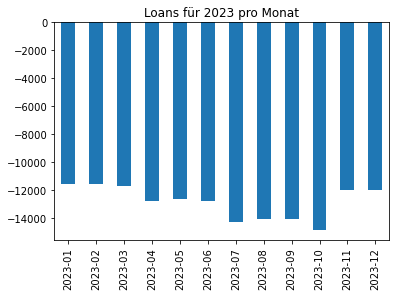

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Loans,-11570.00,-11561.00,-11708.00,-12779.00,-12661.00,-12783.00,-14317.00,-14096.00,-14096.00,-14826.00,-11961.00,-11961.00


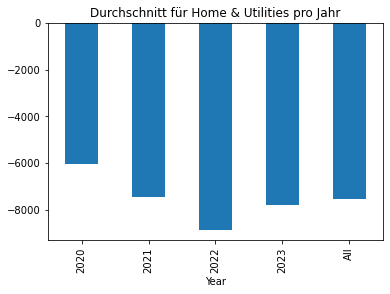

Year,2020,2021,2022,2023,All
Home & Utilities,-6058.37,-7435.87,-8862.22,-7814.96,-7542.86


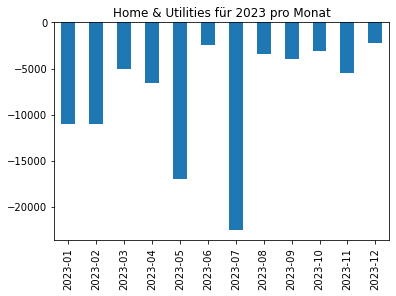

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Home & Utilities,-11053.25,-10991.00,-5033.00,-6526.00,-17013.00,-2468.74,-22493.42,-3421.00,-3987.00,-3086.00,-5529.59,-2177.57


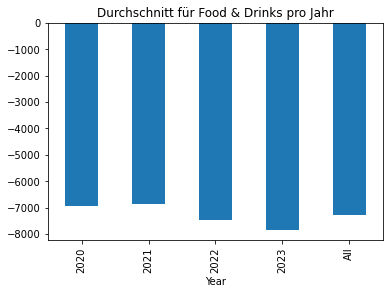

Year,2020,2021,2022,2023,All
Food & Drinks,-6944.03,-6854.13,-7473.78,-7846.48,-7279.61


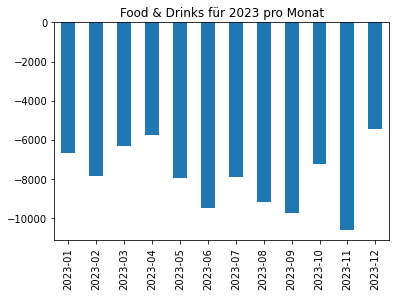

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Food & Drinks,-6652.35,-7854.00,-6314.00,-5748.58,-7939.00,-9499.33,-7919.81,-9200.85,-9769.15,-7235.92,-10593.07,-5431.70


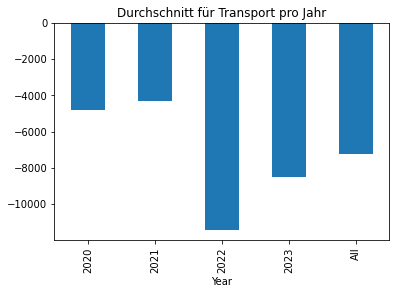

Year,2020,2021,2022,2023,All
Transport,-4780.43,-4323.78,-11424.37,-8499.64,-7257.05


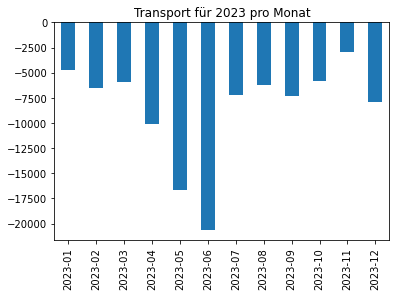

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Transport,-4735.63,-6553.00,-5952.00,-10126.89,-16623.00,-20597.74,-7211.17,-6178.00,-7281.95,-5802.29,-2975.51,-7958.53


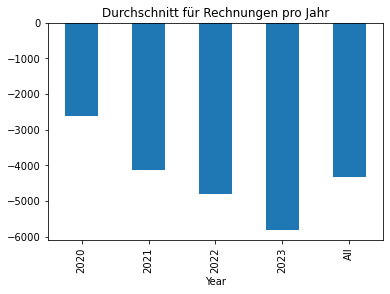

Year,2020,2021,2022,2023,All
Rechnungen,-2605.17,-4125.25,-4792.72,-5812.20,-4333.84


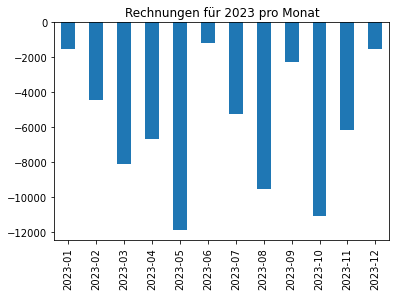

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Rechnungen,-1535.00,-4470.00,-8117.00,-6704.00,-11868.00,-1183.00,-5223.00,-9571.00,-2281.00,-11113.00,-6181.42,-1500.00


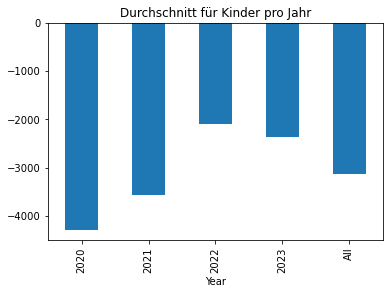

Year,2020,2021,2022,2023,All
Kinder,-4293.00,-3572.00,-2093.00,-2358.31,-3132.35


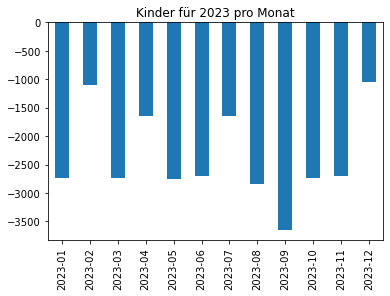

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Kinder,-2742.00,-1097.00,-2742.00,-1645.00,-2751.00,-2701.00,-1645.00,-2841.00,-3645.00,-2742.00,-2705.11,-1043.62


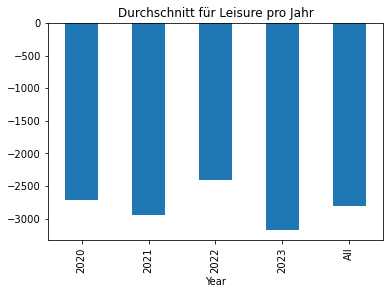

Year,2020,2021,2022,2023,All
Leisure,-2708.13,-2947.91,-2411.10,-3172.22,-2809.84


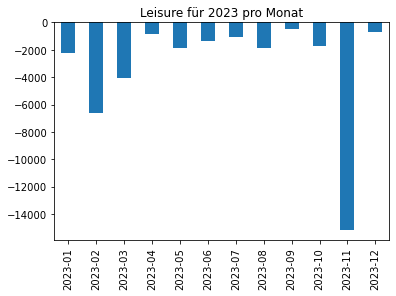

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Leisure,-2221.49,-6635.00,-4091.00,-876.82,-1872.00,-1338.21,-1088.00,-1865.27,-511.79,-1717.66,-15130.43,-718.98


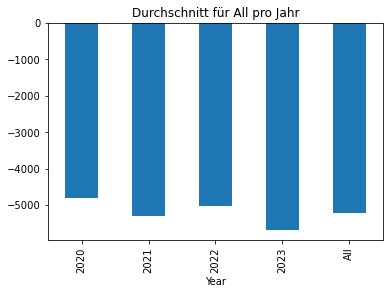

Year,2020,2021,2022,2023,All
All,-4805.84,-5307.35,-5010.92,-5681.57,-5204.44


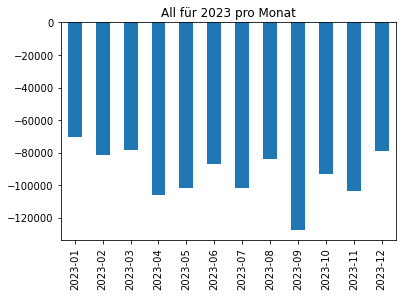

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
All,-70217.69,-81630.00,-78451.00,-106320.59,-101443.00,-86920.96,-101809.28,-83975.90,-127274.76,-93051.36,-103408.56,-79084.78


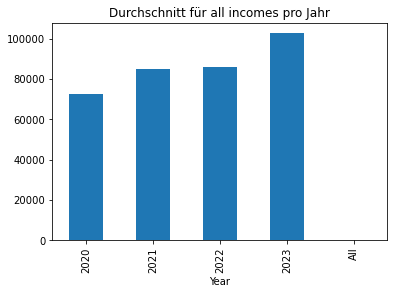

Year,2020,2021,2022,2023,All
all incomes,72733.33,84958.54,85844.42,102729.33,NaN


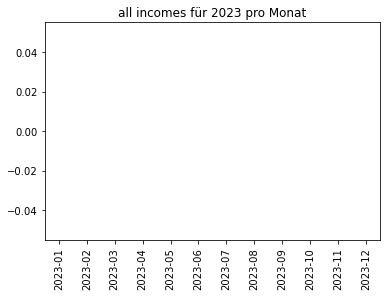

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
all incomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


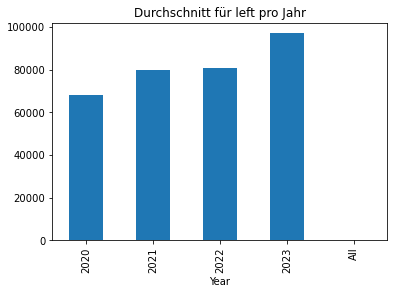

Year,2020,2021,2022,2023,All
left,67927.49,79651.19,80833.50,97047.76,NaN


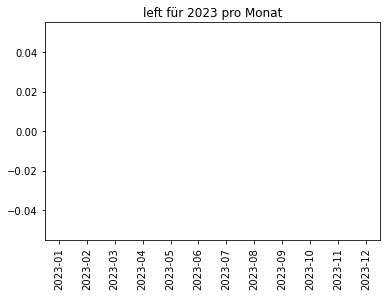

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


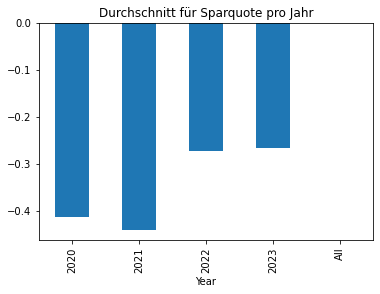

Year,2020,2021,2022,2023,All
Sparquote,-0.41,-0.44,-0.27,-0.27,NaN


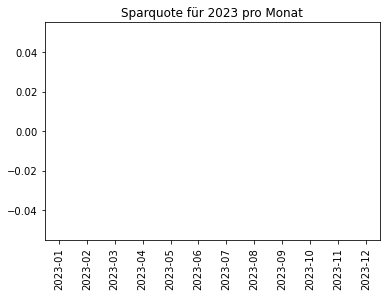

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Sparquote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


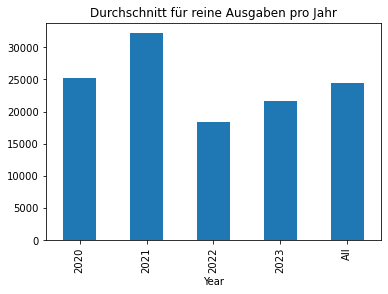

Year,2020,2021,2022,2023,All
reine Ausgaben,25273.99,32179.23,18409.58,21674.26,24381.24


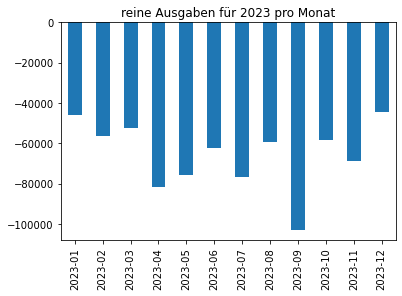

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
reine Ausgaben,-45717.69,-56170.00,-52211.00,-81820.59,-75913.00,-62420.96,-76769.28,-59475.90,-102774.76,-58551.36,-68908.56,-44584.78


In [287]:
#only top 10 categories (by all)

for cat in top10:
    avg_per_year_cat(pivotYear, cat)
    max_year_monthly_cat(pivotMonth, cat, columns_for_year)
